In [ ]:
#1.IMPORTING LIBRARIES
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
#2.EXPLORING THE DATA
data=pd.read_csv('Mall_Customers.csv')
print("Number of datas:", len(data))
data.head()

Number of datas: 200


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#informations about customer datas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#To remove the NA values
data = data.dropna()
print("The total number of datas after removing the rows with missing values are:")
len(data)

The total number of datas after removing the rows with missing values are:


200

In [6]:
data["CustomerID"] = pd.to_datetime(data["CustomerID"])
dates = []
for i in data["CustomerID"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 1970-01-01
The oldest customer's enrolment date in the records: 1970-01-01


In [7]:
print(f"Male : {len(data[data['Gender'] == 'Male'])}")
print(f"Female : {len(data[data['Gender'] == 'Female'])}")

Male : 88
Female : 112


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
mean,1970-01-01 00:00:00.000000100,38.850000,60.560000,50.200000
min,1970-01-01 00:00:00.000000001,18.000000,15.000000,1.000000
25%,1970-01-01 00:00:00.000000050,28.750000,41.500000,34.750000
50%,1970-01-01 00:00:00.000000100,36.000000,61.500000,50.000000
75%,1970-01-01 00:00:00.000000150,49.000000,78.000000,73.000000
max,1970-01-01 00:00:00.000000200,70.000000,137.000000,99.000000
std,NaN,13.969007,26.264721,25.823522


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

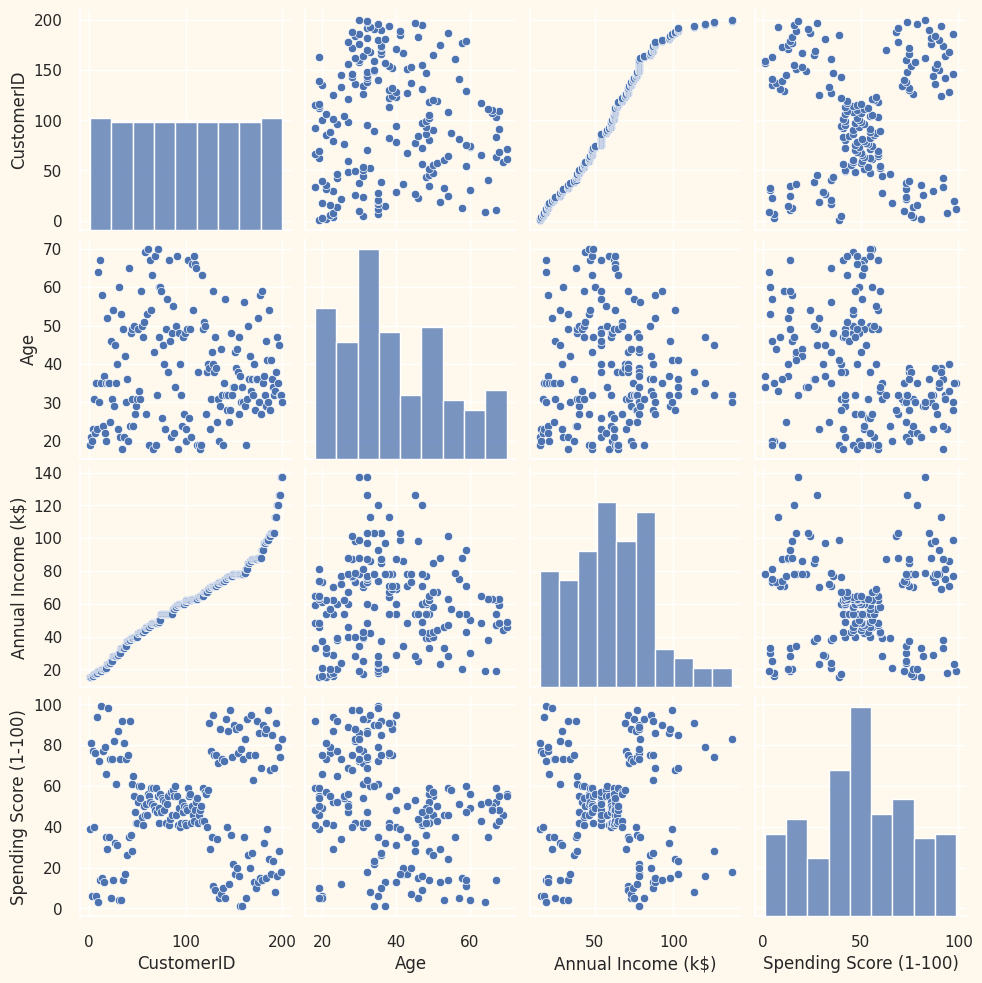

In [9]:
#3.DATA VISUALIZATION
#To plot some selected features 
#Setting up colors prefrences
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('Mall_Customers.csv')
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot =['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot])
#Taking hue 
plt.show()

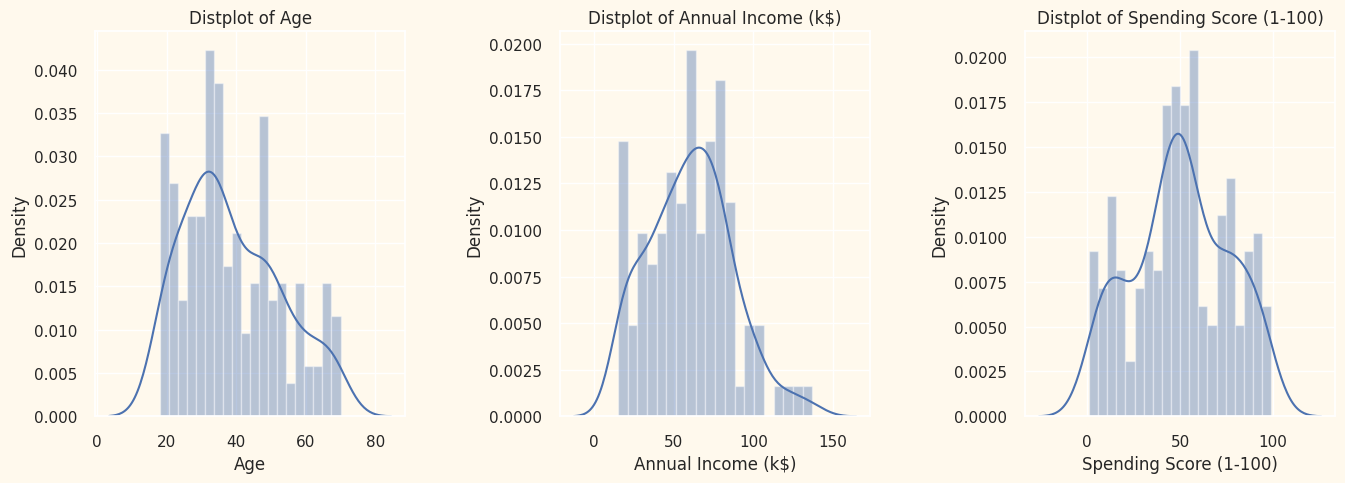

In [10]:
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(1 , figsize = (16 , 5))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

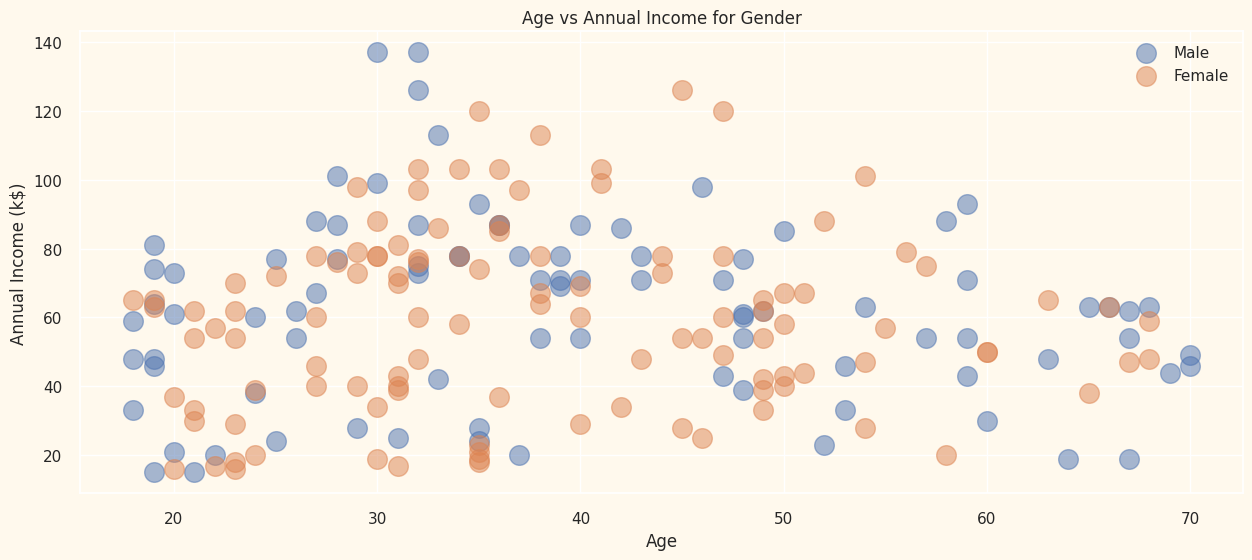

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('Mall_Customers.csv')
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data=data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income for Gender')
plt.legend()
plt.show()

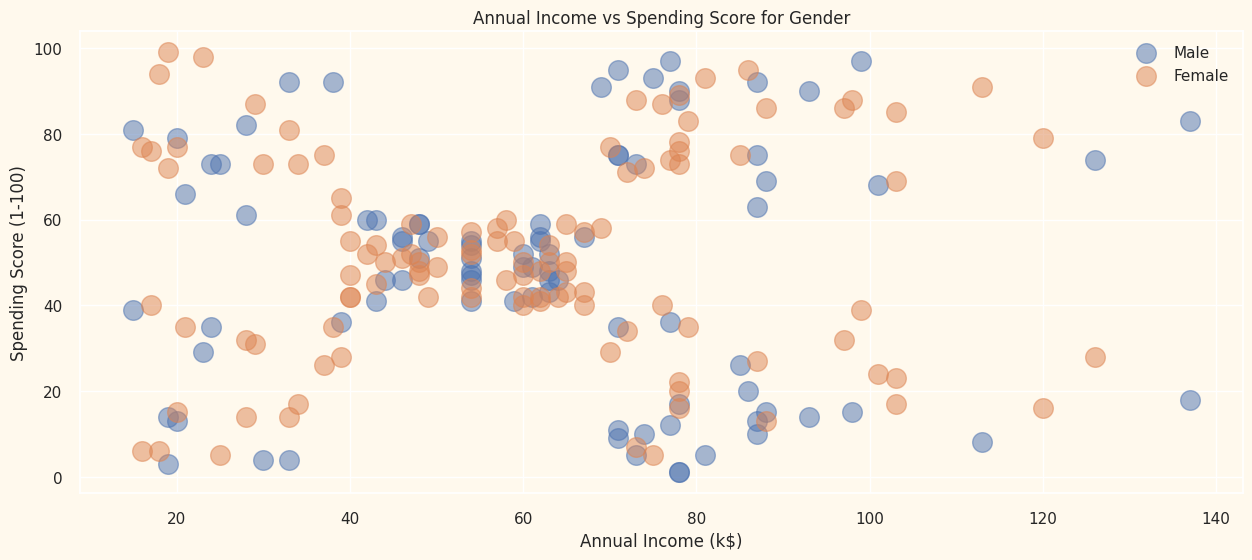

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('Mall_Customers.csv')
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score for Gender')
plt.legend()
plt.show()

In [13]:
#4.CLUSTERING USING K- MEANS
#4.1.Segmentation using Age and Spending Score
from sklearn.cluster import KMeans
#'''Age and spending Score'''
X1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

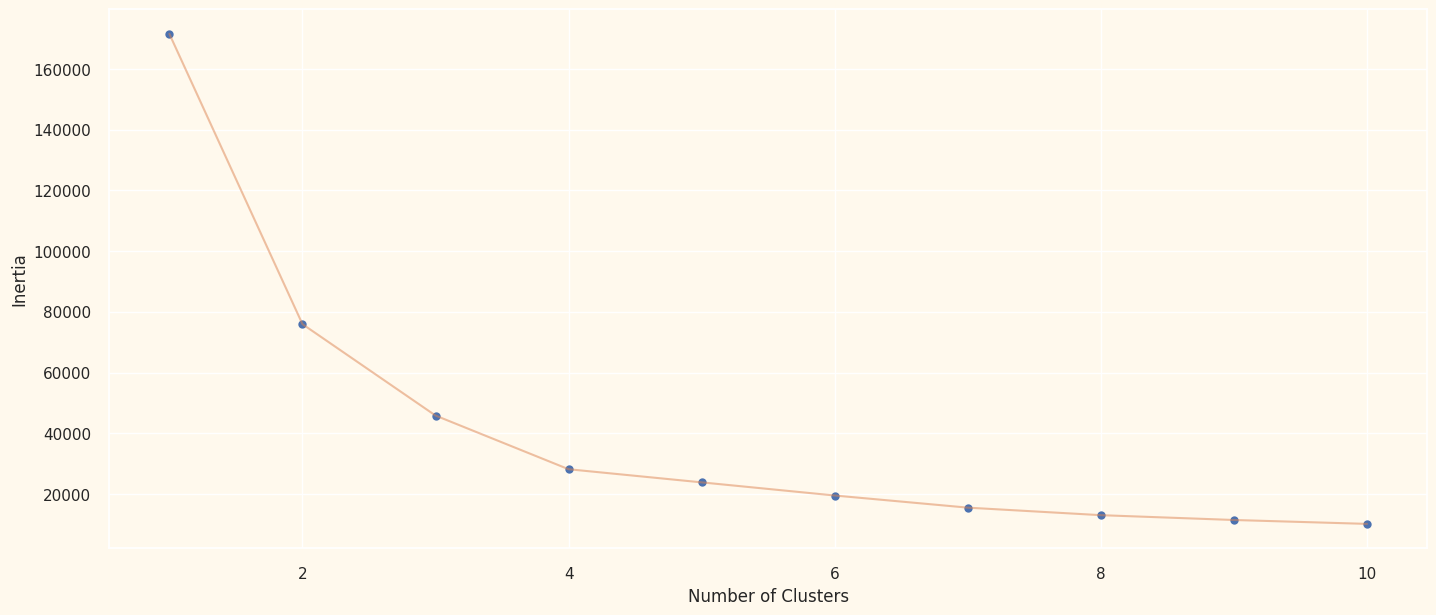

In [14]:
import numpy as np
plt.figure(1 , figsize = (17 ,7))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [15]:
#4.2segmentation using Annual Income and Spending Score
#''' Annual Income and spending Score'''
X1 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

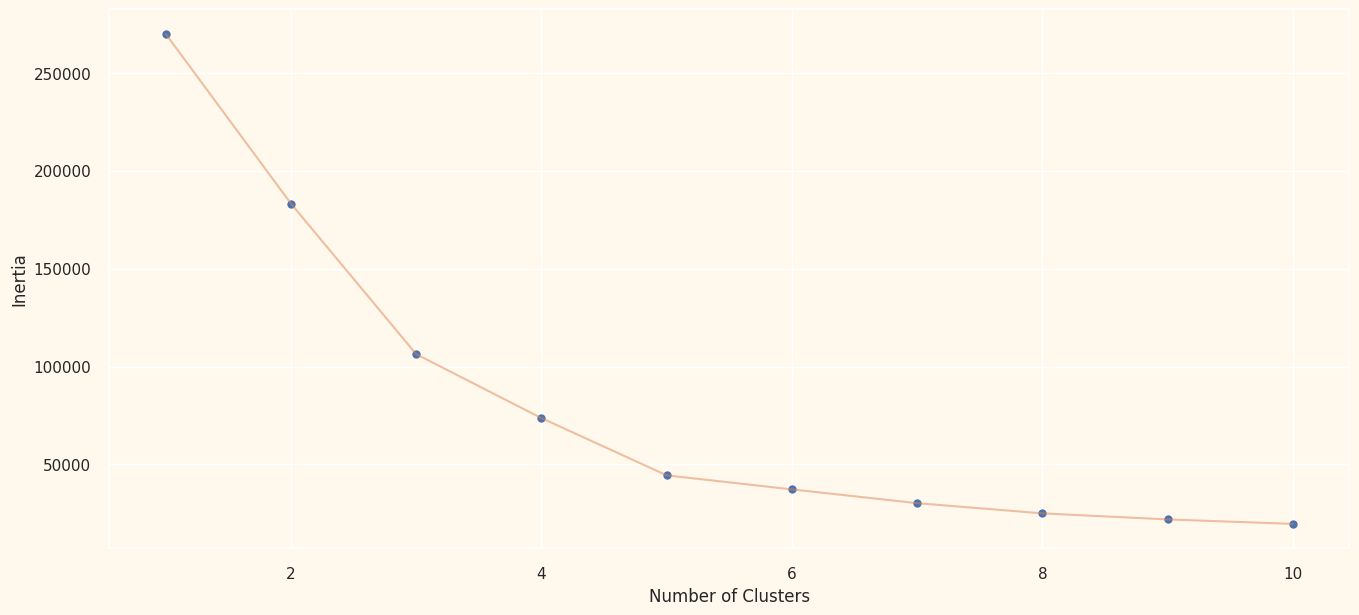

In [16]:
import numpy as np
plt.figure(1 , figsize = (16 ,7))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()-

In [17]:
#4.3Segmentation using Age , Annual Income and Spending Score
X3 = data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

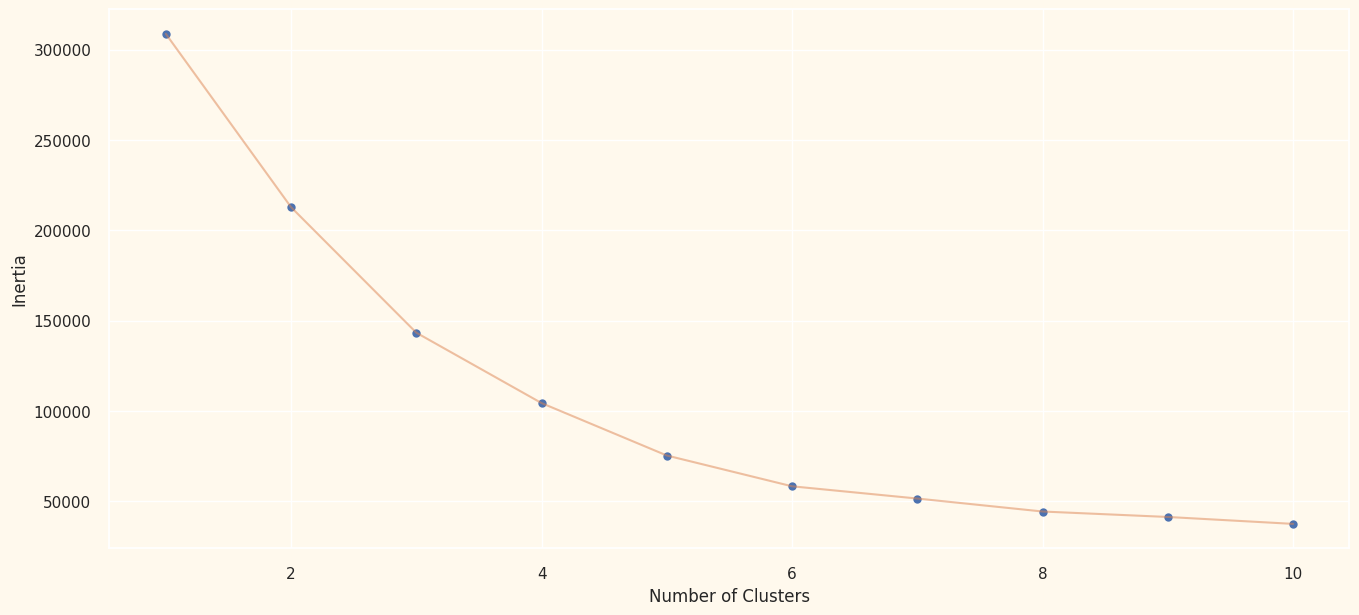

In [18]:
import numpy as np
plt.figure(1 , figsize = (16 ,7))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()